# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [ ]:
import torch as th

1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
t = th.randint(0, 12, size=(10, ), dtype=th.float32)
# th.randint(0, 12, size=(10, )).to(dtype=th.float32)
# th.randint(0, 12, size=(10, )).long()
t

tensor([11.,  3.,  3., 10., 11.,  5.,  5., 10.,  9.,  7.])

In [ ]:
t.dtype, t.size(), t.shape

(torch.float32, torch.Size([10]), torch.Size([10]))

In [ ]:
t = th.randint(0, 12, size=(10, 5, 5), dtype=th.float32)

In [ ]:
t.size(), t.shape

(torch.Size([10, 5, 5]), torch.Size([10, 5, 5]))

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
t = th.randint(0, 12, size=(10, 5, 5), dtype=th.float32)

In [ ]:
t[0, 0, 0], t[0, 0], t[0, 0, 2:4]

(tensor(5.), tensor([ 5.,  8., 10.,  0.,  5.]), tensor([10.,  0.]))

In [ ]:
t[0, 0, 0].item()

5.0

In [ ]:
t[0, 0, [False, True, False, True, True]]

tensor([8., 0., 5.])

In [ ]:
t[0, 0, th.arange(5) % 2 ==0]

tensor([ 5., 10.,  5.])

In [ ]:
t[0, 0, [0, 3, 2, 0, 3]] # набор индексов

tensor([ 5.,  0., 10.,  5.,  0.])

In [ ]:
t[0, 0, :] = 999 # иногда возвращает копию

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [ ]:
t = th.randint(0, 12, size=(5, 5), dtype=th.float32)
t

tensor([[ 6.,  2.,  6.,  3.,  6.],
        [ 4.,  2.,  9.,  4.,  0.],
        [ 9., 10.,  7.,  3.,  4.],
        [ 9., 10.,  7.,  9.,  8.],
        [ 6.,  2.,  1., 11.,  9.]])

In [ ]:
t + 123

tensor([[129., 125., 129., 126., 129.],
        [127., 125., 132., 127., 123.],
        [132., 133., 130., 126., 127.],
        [132., 133., 130., 132., 131.],
        [129., 125., 124., 134., 132.]])

In [ ]:
t2 = th.ones(5)

In [ ]:
t + t2

tensor([[ 7.,  3.,  7.,  4.,  7.],
        [ 5.,  3., 10.,  5.,  1.],
        [10., 11.,  8.,  4.,  5.],
        [10., 11.,  8., 10.,  9.],
        [ 7.,  3.,  2., 12., 10.]])

In [ ]:
t.shape, t2.shape

(torch.Size([5, 5]), torch.Size([5]))

4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [ ]:
import numpy as np

In [ ]:
#np.sin(t)
th.sin(t)

tensor([[-0.2794,  0.9093, -0.2794,  0.1411, -0.2794],
        [-0.7568,  0.9093,  0.4121, -0.7568,  0.0000],
        [ 0.4121, -0.5440,  0.6570,  0.1411, -0.7568],
        [ 0.4121, -0.5440,  0.6570,  0.4121,  0.9894],
        [-0.2794,  0.9093,  0.8415, -1.0000,  0.4121]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler().fit_transform(t)

array([[0.4       , 0.        , 0.625     , 0.        , 0.66666667],
       [0.        , 0.        , 1.        , 0.125     , 0.        ],
       [1.        , 1.        , 0.75      , 0.        , 0.44444444],
       [1.        , 1.        , 0.75      , 0.75      , 0.88888889],
       [0.4       , 0.        , 0.        , 1.        , 1.        ]])

In [ ]:
import torch as th

In [ ]:
th.cuda.is_available()

True

In [ ]:
t.to(device='cuda')

tensor([[ 6.,  2.,  6.,  3.,  6.],
        [ 4.,  2.,  9.,  4.,  0.],
        [ 9., 10.,  7.,  3.,  4.],
        [ 9., 10.,  7.,  9.,  8.],
        [ 6.,  2.,  1., 11.,  9.]], device='cuda:0')

In [ ]:
t.cuda()

tensor([[ 6.,  2.,  6.,  3.,  6.],
        [ 4.,  2.,  9.,  4.,  0.],
        [ 9., 10.,  7.,  3.,  4.],
        [ 9., 10.,  7.,  9.,  8.],
        [ 6.,  2.,  1., 11.,  9.]], device='cuda:0')

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [ ]:
import torch as th

In [ ]:
zeros = th.zeros((100_000, 10))

ones = th.randint(0, 10, size=(100_000,), dtype=th.int32)
zeros[th.arange(100_000), ones] = 1

In [ ]:
probabilities = th.sum(zeros, axis=0) / 100_000
probabilities

tensor([0.0998, 0.0995, 0.0983, 0.1014, 0.1002, 0.1014, 0.0978, 0.1006, 0.1008,
        0.1000])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [ ]:
n = 10
A = th.randint(0, 10, size=(n,n))
A

tensor([[5, 8, 8, 8, 0, 4, 1, 8, 7, 1],
        [6, 0, 9, 5, 7, 5, 3, 8, 4, 3],
        [7, 7, 6, 9, 2, 6, 8, 6, 2, 2],
        [4, 2, 3, 9, 4, 5, 8, 6, 8, 7],
        [4, 1, 1, 3, 6, 6, 8, 7, 7, 7],
        [7, 4, 5, 4, 9, 5, 1, 7, 7, 5],
        [5, 4, 6, 9, 4, 5, 5, 2, 5, 1],
        [0, 0, 0, 7, 9, 4, 1, 1, 8, 4],
        [3, 8, 2, 6, 1, 9, 1, 7, 9, 3],
        [8, 9, 0, 2, 5, 0, 1, 8, 4, 8]])

In [ ]:
m = th.arange(n)
mask = m[:,None] < n - m
mask

tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False, False, False],
        [ True,  True, False, False, False, False, False, False, False, False],
        [ True, False, False, False, False, False, False, False, False, False]])

In [ ]:
A[mask]

tensor([5, 8, 8, 8, 0, 4, 1, 8, 7, 1, 6, 0, 9, 5, 7, 5, 3, 8, 4, 7, 7, 6, 9, 2,
        6, 8, 6, 4, 2, 3, 9, 4, 5, 8, 4, 1, 1, 3, 6, 6, 7, 4, 5, 4, 9, 5, 4, 6,
        9, 0, 0, 0, 3, 8, 8])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 2х2 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

In [ ]:
n = 5
th.manual_seed(42)
t = th.randint(0, 100, size=(n, n))
t

tensor([[42, 67, 76, 14, 26],
        [35, 20, 24, 50, 13],
        [78, 14, 10, 54, 31],
        [72, 15, 95, 67,  6],
        [49, 76, 73, 11, 99]])

In [ ]:
z = th.argmax(t)
x0 = z // n
y0 = z % n

In [ ]:
x0, y0

(tensor(4), tensor(4))

In [ ]:
upper_bound = max((x0 - 1).item(), 0)
lower_bound = min((x0 + 1).item(), n)
right_bound = max(0, (y0 - 1).item())
left_bound = min(n, (y0 + 1).item())

In [ ]:
upper_bound, lower_bound, right_bound, left_bound

(3, 5, 3, 5)

In [ ]:
t_ = t.detach().clone()
t_[:upper_bound] = 0
t_[lower_bound:] = 0
t_[:,:right_bound] = 0
t_[:,left_bound:] = 0

In [ ]:
t_

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0, 67,  6],
        [ 0,  0,  0, 11, 99]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

In [ ]:
t_merged = th.stack([t, t_]); t_merged

tensor([[[42, 67, 76, 14, 26],
         [35, 20, 24, 50, 13],
         [78, 14, 10, 54, 31],
         [72, 15, 95, 67,  6],
         [49, 76, 73, 11, 99]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0, 67,  6],
         [ 0,  0,  0, 11, 99]]])

In [ ]:
th.save(t_merged, 'tensors.pt')

In [ ]:
loaded = th.load('tensors.pt'); loaded

tensor([[[42, 67, 76, 14, 26],
         [35, 20, 24, 50, 13],
         [78, 14, 10, 54, 31],
         [72, 15, 95, 67,  6],
         [49, 76, 73, 11, 99]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0, 67,  6],
         [ 0,  0,  0, 11, 99]]])

In [ ]:
t_merged.equal(loaded)

True

5. Создайте четырехмерный массив t размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора t[i, j, :, :]. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [ ]:
t = th.randint(1, 10, size=(2, 3, 5, 5), dtype=th.float32)
t

tensor([[[[5., 5., 1., 7., 2.],
          [3., 2., 2., 7., 6.],
          [7., 3., 4., 9., 5.],
          [5., 3., 2., 3., 5.],
          [6., 5., 6., 7., 8.]],

         [[3., 5., 8., 7., 3.],
          [5., 1., 6., 4., 8.],
          [8., 3., 1., 3., 5.],
          [2., 4., 3., 5., 7.],
          [6., 8., 4., 8., 5.]],

         [[6., 8., 8., 5., 6.],
          [4., 3., 3., 8., 9.],
          [7., 3., 8., 2., 3.],
          [3., 7., 1., 8., 4.],
          [2., 7., 2., 1., 3.]]],


        [[[1., 8., 4., 1., 8.],
          [9., 1., 6., 6., 5.],
          [2., 8., 5., 8., 8.],
          [8., 3., 7., 1., 1.],
          [9., 2., 8., 5., 9.]],

         [[6., 4., 7., 7., 8.],
          [9., 1., 8., 3., 2.],
          [3., 1., 3., 5., 7.],
          [2., 1., 7., 2., 9.],
          [8., 6., 3., 7., 6.]],

         [[3., 5., 3., 7., 1.],
          [2., 5., 7., 8., 6.],
          [9., 8., 5., 2., 7.],
          [9., 8., 2., 5., 4.],
          [5., 8., 6., 1., 7.]]]])

In [ ]:
th.mean(t, dim=[2, 3], keepdim=True)

tensor([[[[4.7200]],

         [[4.8800]],

         [[4.8400]]],


        [[[5.3200]],

         [[5.0000]],

         [[5.3200]]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

In [ ]:
import matplotlib.pyplot as plt
import torch as th

In [ ]:
N = 100_000_000
lam_val = 5
T = th.empty(N)
T_cpu = T.exponential_(lambd=lam_val)

CPU times: user 1.46 s, sys: 1.75 ms, total: 1.46 s
Wall time: 1.55 s


<BarContainer object of 100 artists>

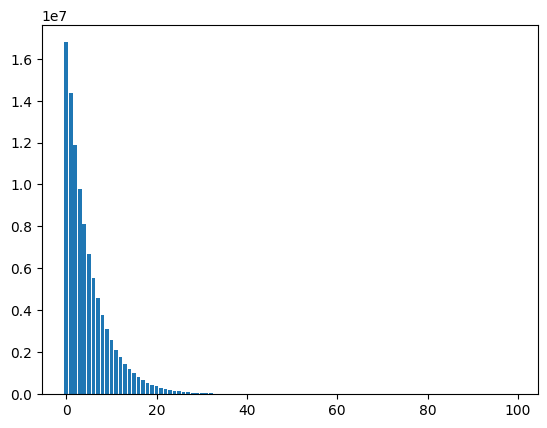

In [ ]:
%%time
hist = th.histc(T_cpu, bins=100)
plt.bar(range(len(hist)), hist);

In [ ]:
N = 100_000_000
lam_val = 5
T = th.empty(N)
T_gpu = T.exponential_(lambd=lam_val).cuda()

CPU times: user 194 ms, sys: 4.11 ms, total: 198 ms
Wall time: 199 ms


<BarContainer object of 100 artists>

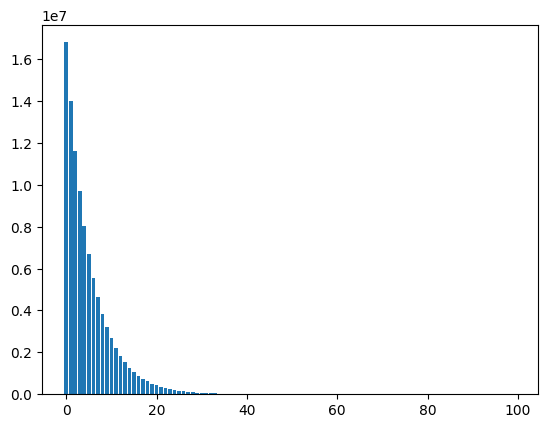

In [ ]:
%%time
hist = th.histc(T_gpu, bins=100)

hist_cpu_ = hist.to(device='cpu')
plt.bar(range(len(hist_cpu_)), hist_cpu_);

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

In [ ]:
A = th.randint(0, 255, size=(10, 6, 6, 3), dtype=th.float32)
A[:, :, :, 0][:, :, 2:] = 0
A[:, :, :, 1][:, :, 1:4] = 0
A[:, :, :, 2][:, :, 4:] = 0

## Обратная связь
- [ ] Хочу получить обратную связь по решению